<center style="font-family: Algerian; font-size:3em;color:red; font-style:bold"> <br> Logistic Regression <br> <br>  </center>  

$$\large  z= x\omega + b \Longrightarrow \sigma(z) \Longrightarrow \hat y $$

In [1]:
import torch as pt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

There are **two ways** to build the Logistic Regression function:

# 1
**Calling** `torch.nn`

In [2]:
import torch.nn as nn

Text(0.5,1,'Logistic Regression')

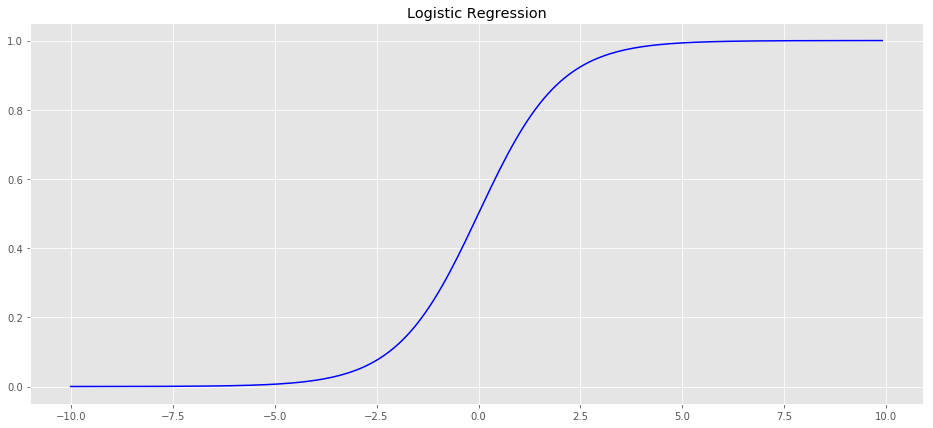

In [3]:
z= pt.arange(-10,10,0.1).view(-1,1)
sig= nn.Sigmoid()
yhat=sig(z)
plt.figure(figsize=(16,7))
plt.plot(z.numpy(),yhat.numpy(),color='blue')
plt.title('Logistic Regression')

# 2
**Calling no one more** 

Text(0.5,1,'Logistic Regression')

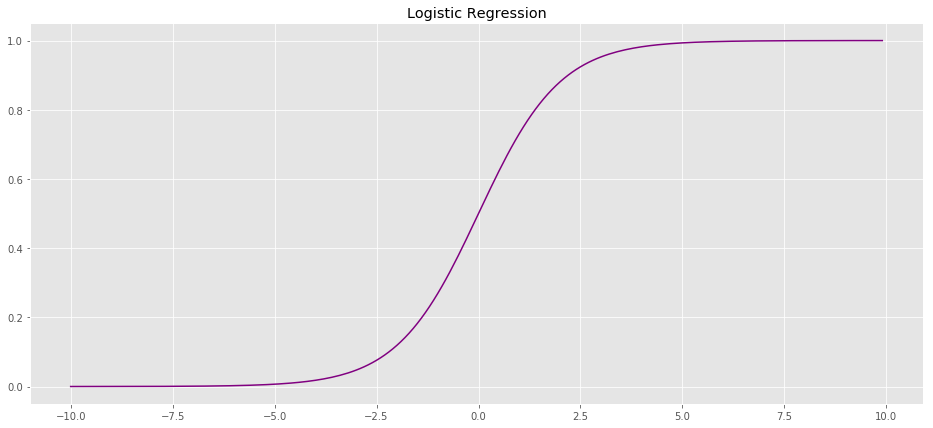

In [4]:
z= pt.arange(-10,10,0.1)
yhat= pt.sigmoid(z)
plt.figure(figsize=(16,7))
plt.plot(z.numpy(),yhat.numpy(),color='purple')
plt.title('Logistic Regression')

So for practical purposes, **it's preferible using last option.**

# Building the model

One way is writing the following code(take into account **just in case**) :
```Python 
import torch.nn as nn

class logistic_regression(nn.Module):
    def __init__(self,in_size,out_size):
        super(logistic_regression,self).__init__()
        self.linear=nn.Linear(in_size,1)
    def forward(self,x):
        out = pt.sigmoid(self.linear(x))
        return out```
``` Python 
model=logistic_regression(1,1)```

**But the easier way is as following:**

# 1-col input:

In [5]:
model=nn.Sequential(nn.Linear(1,1),nn.Sigmoid())

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9326]], requires_grad=True), Parameter containing:
 tensor([-0.9973], requires_grad=True)]

Testing:

In [7]:
x= pt.tensor([[1.0]])
yhat=model(x)
yhat

tensor([[0.4838]], grad_fn=<SigmoidBackward>)

Now a 2-component column vector:

In [8]:
x= pt.tensor([[1.0],[100]])
yhat=model(x)
yhat

tensor([[0.4838],
        [1.0000]], grad_fn=<SigmoidBackward>)

# 2-column input:

In [9]:
model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2920, -0.0838]], requires_grad=True), Parameter containing:
tensor([-0.6999], requires_grad=True)]


In [11]:
x= pt.tensor([[1.0,1.0]])
yhat=model(x)
yhat

tensor([[0.2543]], grad_fn=<SigmoidBackward>)

Now a 3*2 vector:

In [12]:
x=pt.tensor([[1.0,1.0],[1.0,2.0],[3.1,-1.0]])
yhat=model(x)
yhat

tensor([[0.2543],
        [0.2388],
        [0.1793]], grad_fn=<SigmoidBackward>)